In [3]:
import numpy as py
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

After importing our libraries, let's read the csv file:

(Data Received from E-Commerce Transactions Dataset. (2025, March 8). Kaggle. https://www.kaggle.com/datasets/smayanj/e-commerce-transactions-dataset/data, under creative commons)

In [33]:
df = pd.read_csv('~/downloads/ecommerce_transactions.csv')

Let's get some basic info about the dataset

In [35]:
df.shape

(50000, 8)

In [37]:
df.describe()

,Transaction_ID,Age,Purchase_Amount
count,50000.000000,50000.000000,50000.000000
mean,25000.500000,43.968680,503.159793
std,14433.901067,15.260578,286.563558
min,1.000000,18.000000,5.040000
25%,12500.750000,31.000000,255.450000
50%,25000.500000,44.000000,503.110000
75%,37500.250000,57.000000,751.162500
max,50000.000000,70.000000,999.980000


In [39]:
df.isna().sum()

Transaction_ID      0
User_Name           0
Age                 0
Country             0
Product_Category    0
Purchase_Amount     0
Payment_Method      0
Transaction_Date    0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    50000 non-null  int64  
 1   User_Name         50000 non-null  object 
 2   Age               50000 non-null  int64  
 3   Country           50000 non-null  object 
 4   Product_Category  50000 non-null  object 
 5   Purchase_Amount   50000 non-null  float64
 6   Payment_Method    50000 non-null  object 
 7   Transaction_Date  50000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.1+ MB


In [43]:
sns.set_theme(style='dark')

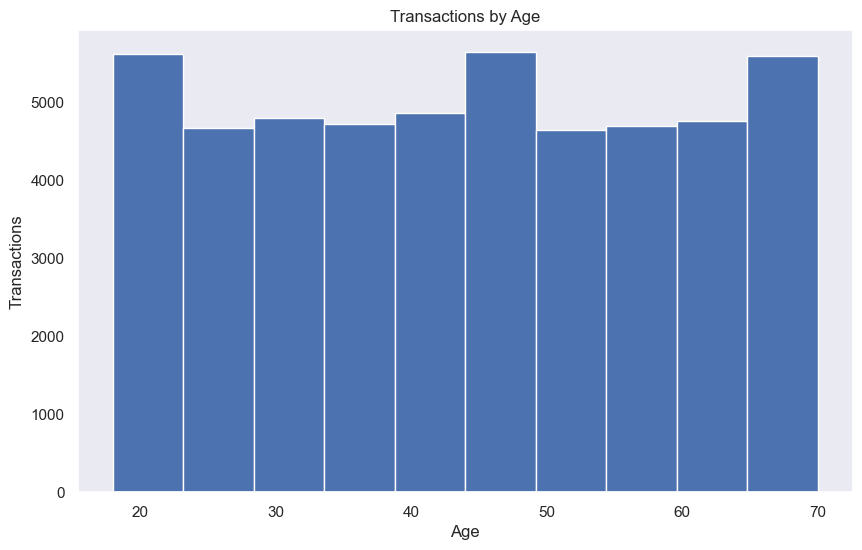

In [45]:
transactions_fig = df['Age'].plot(
    kind='hist',
    title='Transactions by Age',
    xlabel = 'Age',
    ylabel='Transactions',
    figsize = (10,6)
)

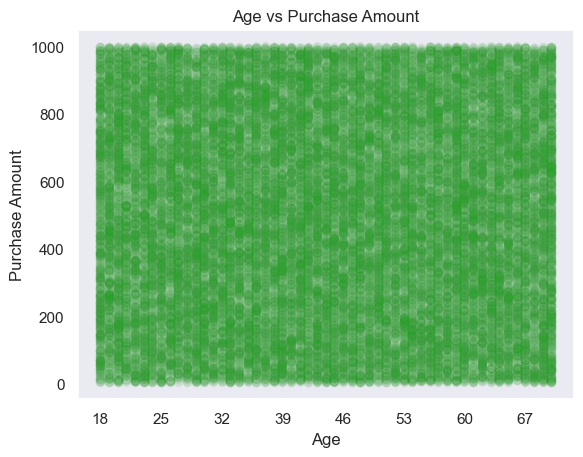

In [53]:
plt.scatter(
    x=df['Age'],
    y=df['Purchase_Amount'],
    c='#2ca02c',
    alpha=.05);
plt.title('Age vs Purchase Amount');
plt.xlabel('Age');
plt.ylabel('Purchase Amount');
plt.xticks(range(18,70,7));

To create a heatmap to compare correlation, let's select only numerics.
To do this, we will have to either create a separate dataframe with only numerics, or we would have to select only
numerics when creating the heatmap. In this case I have decided to create a numeric dataframe and then select the
numeric dataframe.

In [1101]:
num = (['int16','int32','int64','float16','float32','float64'])

In [1103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    50000 non-null  int64  
 1   User_Name         50000 non-null  object 
 2   Age               50000 non-null  int64  
 3   Country           50000 non-null  object 
 4   Product_Category  50000 non-null  object 
 5   Purchase_Amount   50000 non-null  float64
 6   Payment_Method    50000 non-null  object 
 7   Transaction_Date  50000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.1+ MB


In [1105]:
df['Transaction_ID'] = df['Transaction_ID'].to_string()

In [1107]:
df_num = df.select_dtypes(num)

In [1109]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              50000 non-null  int64  
 1   Purchase_Amount  50000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 781.4 KB


In [1111]:
decile = []
for i in range(1, 11):
    decile.append(i/10)

In [1113]:
print(decile)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


In [1115]:
df_num.quantile(decile)

,Age,Purchase_Amount
0.1,23.0,105.698
0.2,28.0,204.868
0.3,33.0,306.417
0.4,39.0,404.870
0.5,44.0,503.110
0.6,49.0,601.100
0.7,55.0,701.423
0.8,60.0,801.574
0.9,65.0,899.112
1.0,70.0,999.980


In [1117]:
df_num.corr()

,Age,Purchase_Amount
Age,1.000000,-0.003585
Purchase_Amount,-0.003585,1.000000


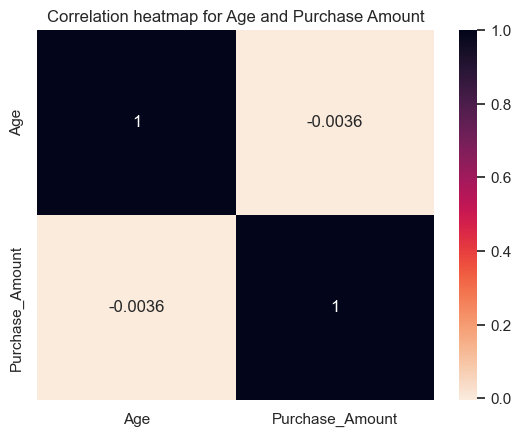

In [1146]:
corr_heatmap = sns.heatmap(df_num.corr(), cmap='rocket_r',annot=True);
corr_heatmap.set_title("Correlation heatmap for Age and Purchase Amount");

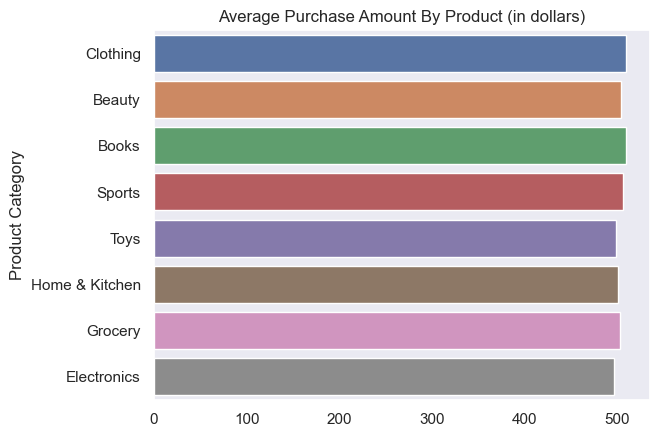

In [1148]:
Purchase_By_Category = sns.barplot(data=df,
            x="Purchase_Amount",
            y="Product_Category",
            hue="Product_Category",
            ci=None
           );
Purchase_By_Category.set(ylabel='Product Category', xlabel='');
Purchase_By_Category.set_title('Average Purchase Amount By Product (in dollars)');

In [363]:
df['Payment_Method'].head()

0     Debit Card
1         PayPal
2    Credit Card
3            UPI
4    Net Banking
Name: Payment_Method, dtype: object

In [369]:
df['Payment_Method'].mode()

0    UPI
Name: Payment_Method, dtype: object

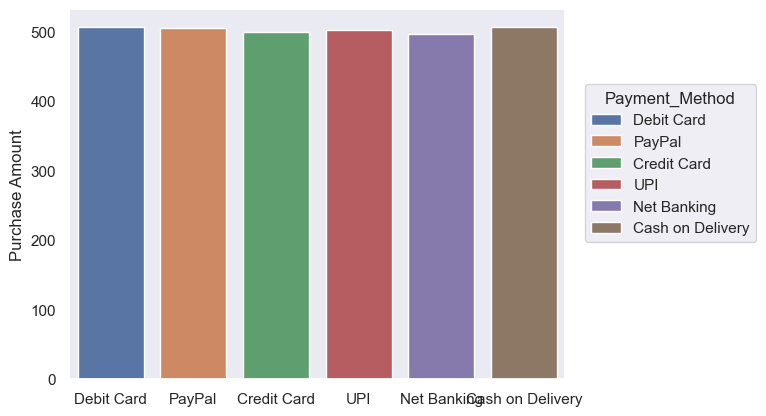

In [1156]:
Payment_Method_Graph = sns.barplot(data=df,
            y='Purchase_Amount',
            x='Payment_Method',
            hue='Payment_Method',
            ci=None,
            legend=True
           );
Payment_Method_Graph.set(xlabel='',ylabel='Purchase Amount')
sns.move_legend(Payment_Method_Graph, 'lower right', bbox_to_anchor=(1.40,.35))

In [1150]:
df['Country'].unique()

array(['Mexico', 'India', 'France', 'Germany', 'Canada', 'Japan',
       'Australia', 'Brazil', 'USA', 'UK'], dtype=object)

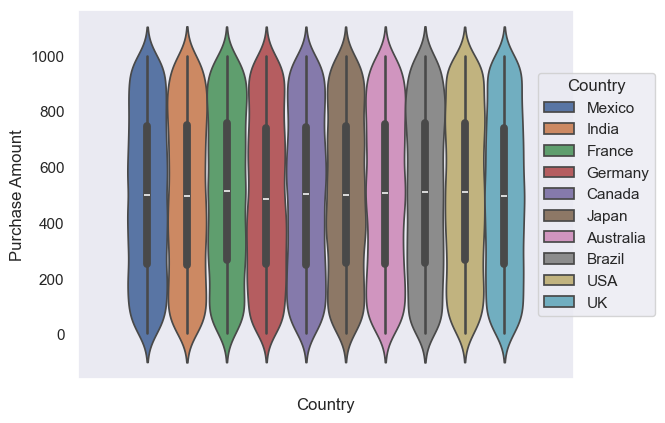

In [1152]:
Purchase_By_Country = sns.violinplot(data=df,
          y='Purchase_Amount',
          hue='Country',
          legend=True
          );
Purchase_By_Country.set(xlabel='Country',ylabel='Purchase Amount');
sns.move_legend(Purchase_By_Country, 'center right',bbox_to_anchor=(1.18,.5))

In [626]:
df['Transaction_Date']

0        2023-04-14
1        2023-07-30
2        2023-09-17
3        2023-06-21
4        2024-10-29
            ...    
49995    2024-08-07
49996    2025-02-07
49997    2023-08-11
49998    2025-01-02
49999    2024-06-03
Name: Transaction_Date, Length: 50000, dtype: object

In [740]:
df['Holiday'] = py.where((df['Transaction_Date'].str.contains('02-14') |
        df['Transaction_Date'].str.contains('10-31') |
        df['Transaction_Date'].str.contains('12-25')), 'Yes', 'No')
df.query('Holiday == 'Yes'')

,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date,Holiday
20,21,Sophia Harris,57,Brazil,Sports,228.80,Credit Card,2025-02-14,Yes
176,177,James Walker,57,Canada,Toys,197.33,Cash on Delivery,2023-12-25,Yes
269,270,Ava Clark,22,Australia,Electronics,654.56,Cash on Delivery,2024-10-31,Yes
293,294,James Allen,24,India,Sports,773.78,Net Banking,2023-12-25,Yes
394,395,Sophia Lewis,32,Germany,Beauty,343.00,PayPal,2025-02-14,Yes
...,...,...,...,...,...,...,...,...,...
49657,49658,Olivia Walker,63,France,Electronics,679.34,PayPal,2023-10-31,Yes
49683,49684,Ava Anderson,27,Canada,Beauty,950.01,PayPal,2025-02-14,Yes
49716,49717,Liam White,69,Mexico,Sports,789.61,Credit Card,2025-02-14,Yes
49878,49879,Emma Rodriguez,36,France,Books,865.55,PayPal,2023-12-25,Yes


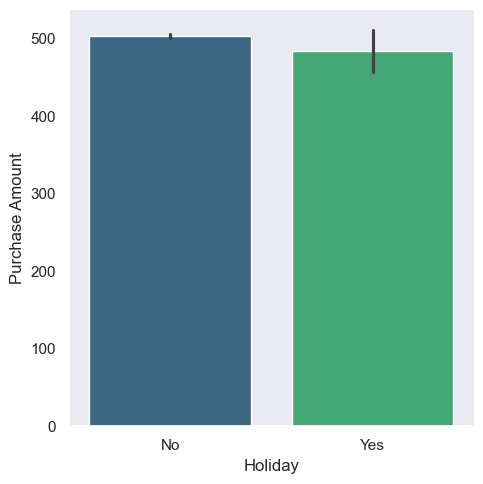

In [776]:
Holiday_Spenting = sns.catplot(kind='bar',
            data=df,
           x='Holiday',
           y='Purchase_Amount',
           hue='Holiday',
           palette='viridis');
Holiday_Spenting.set_axis_labels('Holiday','Purchase Amount');

In [928]:
df['Product_Category'].unique()

array(['Clothing', 'Beauty', 'Books', 'Sports', 'Toys', 'Home & Kitchen',
       'Grocery', 'Electronics'], dtype=object)

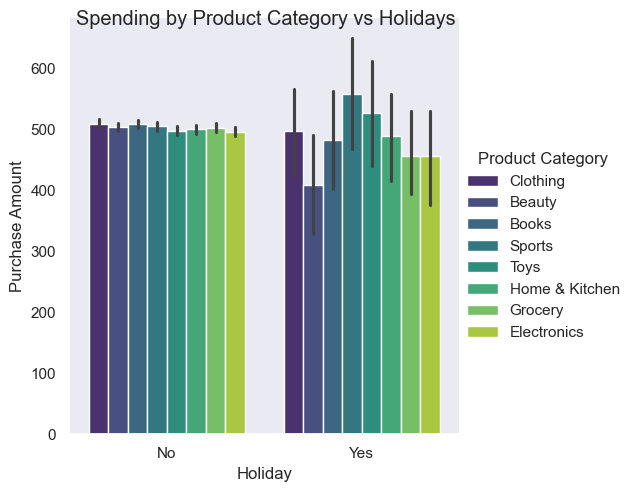

In [926]:
cat = sns.catplot(kind='bar',
            data=df,
           x='Holiday',
           y='Purchase_Amount',
           hue='Product_Category',
           palette='viridis');
cat.set_axis_labels('Holiday','Purchase Amount');
cat.legend.set_title('Product Category');
cat.fig.suptitle('Spending by Product Category vs Holidays',x=.45);

In [ ]:
we will be using a sample dataframe for the next graph in order to reduce the computations required

In [962]:
sample_df = df.sample(500)

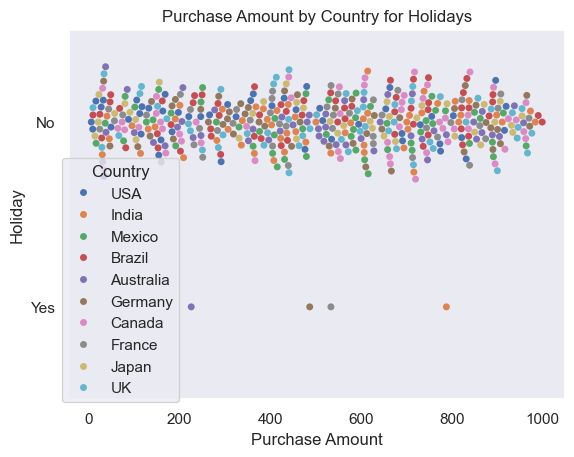

In [964]:
Country_Holiday = sns.swarmplot(data=sample_df,
                   x='Purchase_Amount',
                   y='Holiday',
                   hue='Country')
Country_Holiday.set(xlabel='Purchase Amount',ylabel='Holiday')
Country_Holiday.set_title('Purchase Amount by Country for Holidays')
sns.move_legend(Country_Holiday,'center left',bbox_to_anchor=(-.03,.3233))

In [1036]:
df['User_Name'].sort_values(ascending=False)

35658    Sophia White
3993     Sophia White
20271    Sophia White
20256    Sophia White
3983     Sophia White
             ...     
11162       Ava Allen
25789       Ava Allen
27789       Ava Allen
38979       Ava Allen
36254       Ava Allen
Name: User_Name, Length: 50000, dtype: object

In [1038]:
df['User_Name'].nunique()

100

In [1042]:
df.describe()

,Transaction_ID,Age,Purchase_Amount
count,50000.000000,50000.000000,50000.000000
mean,25000.500000,43.968680,503.159793
std,14433.901067,15.260578,286.563558
min,1.000000,18.000000,5.040000
25%,12500.750000,31.000000,255.450000
50%,25000.500000,44.000000,503.110000
75%,37500.250000,57.000000,751.162500
max,50000.000000,70.000000,999.980000


In [1046]:
high_value_purchases = df['Purchase_Amount'].quantile(.8)

In [1048]:
df.query("Purchase_Amount > @high_value_purchases")

,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date
5,6,Elijah Harris,51,India,Toys,966.50,Cash on Delivery,2025-01-18
13,14,Sophia Anderson,26,France,Toys,871.99,Net Banking,2025-02-05
19,20,James Thompson,43,India,Toys,849.67,Cash on Delivery,2023-04-07
24,25,Ava Allen,21,Germany,Home & Kitchen,838.22,Debit Card,2024-11-05
28,29,Noah Harris,55,Brazil,Beauty,911.02,Cash on Delivery,2023-03-28
...,...,...,...,...,...,...,...,...
49981,49982,Ava Allen,18,Japan,Electronics,846.31,Net Banking,2025-01-25
49987,49988,Ava Anderson,47,Mexico,Electronics,902.26,UPI,2025-02-25
49991,49992,Ava Hall,65,Japan,Grocery,954.57,UPI,2023-10-25
49992,49993,Elijah Rodriguez,39,Germany,Home & Kitchen,855.51,Net Banking,2025-01-19


In [802]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    50000 non-null  int64  
 1   User_Name         50000 non-null  object 
 2   Age               50000 non-null  int64  
 3   Country           50000 non-null  object 
 4   Product_Category  50000 non-null  object 
 5   Purchase_Amount   50000 non-null  float64
 6   Payment_Method    50000 non-null  object 
 7   Transaction_Date  50000 non-null  object 
 8   Holiday           50000 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 3.4+ MB
